<a href="https://colab.research.google.com/github/nan-park/section2_project/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload();

Saving kor_economic_monthly_data.csv to kor_economic_monthly_data.csv
Saving kor_economic_monthly_data_clean.csv to kor_economic_monthly_data_clean.csv
Saving kor_economic_yearly_data.csv to kor_economic_yearly_data.csv
Saving kor_loan_data.csv to kor_loan_data.csv
Saving us_economic_monthly_data.csv to us_economic_monthly_data.csv
Saving us_economic_monthly_data_clean.csv to us_economic_monthly_data_clean.csv


In [3]:
kor_economic_monthly_data = pd.read_csv('kor_economic_monthly_data.csv', index_col=0) # 한국 월별 경제지표(결측치O)(1960-05~2022-08)
kor_economic_monthly_data_clean = pd.read_csv('kor_economic_monthly_data_clean.csv', index_col=0) # 한국 월별 경제지표(결측치X)(1999-05~2022-05)
kor_economic_yearly_data = pd.read_csv('kor_economic_yearly_data.csv', index_col=0) # 한국 연도별 경제지표(결측치O)(1970~2021)
kor_loan_data = pd.read_csv('kor_loan_data.csv', index_col=0) # 한국 가계/기업/국채 대출현황 데이터
us_economic_monthly_data = pd.read_csv('us_economic_monthly_data.csv', index_col=0) # 미국 월별 경제지표(결측치O)(1947-01~2022-09-01)
us_economic_monthly_data_clean = pd.read_csv('us_economic_monthly_data_clean.csv', index_col=0) # 미국 월별 경제지표(1986-01~2022-05)

In [18]:
df_list = [kor_economic_monthly_data, kor_economic_monthly_data_clean, kor_economic_yearly_data, kor_loan_data, us_economic_monthly_data, us_economic_monthly_data_clean]

index의 데이터타입 모두 datetime으로 바꾸기

In [20]:
for i in range(len(df_list)):
  df_list[i].index = pd.to_datetime(df_list[i].index)

**미국 연준 기준금리**

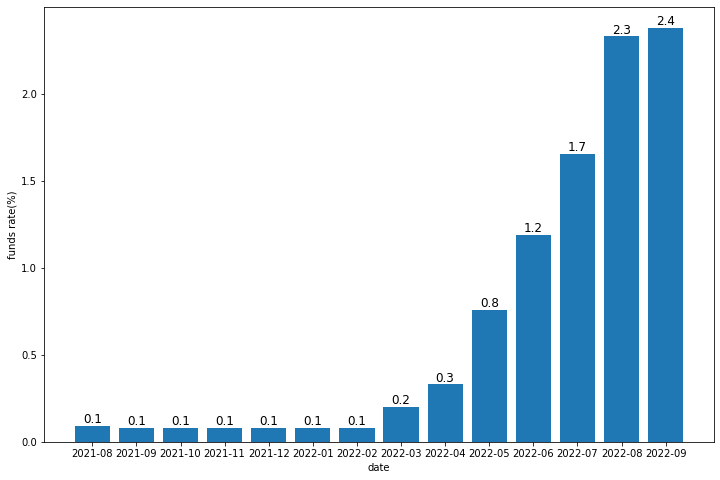

In [41]:
funds_rate = us_economic_monthly_data[us_economic_monthly_data['funds_rate'].isna()==False].funds_rate  # 1954-07~2021-09
funds_rate_2022 = funds_rate['2021-08':'2022']
funds_rate_2022.index = funds_rate_2022.index.astype(str).str[:-3]
plt.figure(figsize=(12, 8))
bar = plt.bar(funds_rate_2022.index, funds_rate_2022.values)
for rect in bar:
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12)
plt.xlabel('date')
plt.ylabel('funds rate(%)')
plt.show()

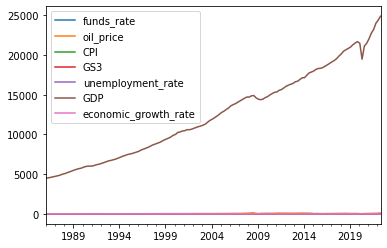

In [42]:
us_economic_monthly_data_clean.plot();